In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
death_df = pd.read_csv('us_simulation.csv')
death_df

,# dates,infections,hospitalizations,deaths,mean_r_t
0,2020-02-05,1089.899348,0.0,0.000000,2.263776
1,2020-02-06,1089.899348,0.0,0.000000,2.263773
2,2020-02-07,1089.899348,0.0,0.000000,2.263773
3,2020-02-08,1089.899348,0.0,0.000000,2.263771
4,2020-02-09,1089.899348,0.0,0.000000,2.263770
...,...,...,...,...,...
266,2020-10-28,399527.064178,66176.0,860.747799,1.093232
267,2020-10-29,407128.665398,67053.0,870.478097,1.094856
268,2020-10-30,414994.398403,67965.0,880.644457,1.096463
269,2020-10-31,423132.398378,68913.0,891.257821,1.098054


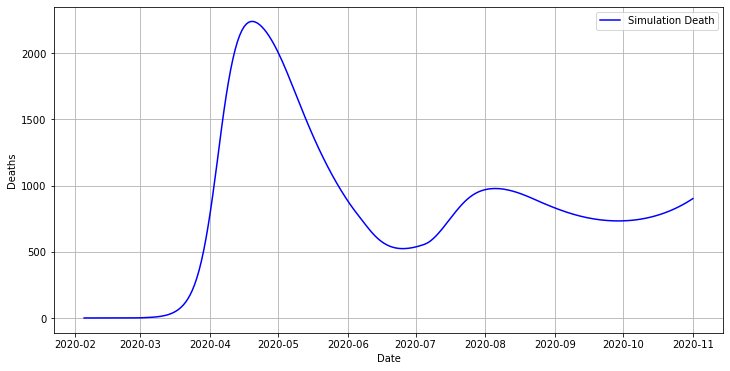

In [3]:
death_df['# dates'] = pd.to_datetime(death_df['# dates'])
dates_np = death_df['# dates'].to_numpy()
deaths_np = death_df['deaths'].to_numpy()
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, label='Simulation Death', color='blue')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

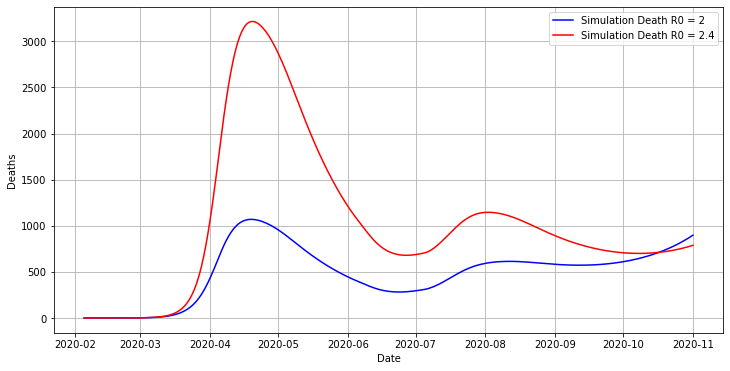

In [4]:
death_df_r2 = pd.read_csv('us_simulation_r0_2.csv')
death_df_r2_4 = pd.read_csv('us_simulation_r0_2.4.csv')

death_df_r2['# dates'] = pd.to_datetime(death_df_r2['# dates'])
death_df_r2_4['# dates'] = pd.to_datetime(death_df_r2_4['# dates'])

dates_r2np = death_df_r2['# dates'].to_numpy()
deaths_r2np = death_df_r2['deaths'].to_numpy()

dates_r2_4np = death_df_r2_4['# dates'].to_numpy()
dates_r2_4np = death_df_r2_4['deaths'].to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(dates_r2np, deaths_r2np, label='Simulation Death R0 = 2', color='blue')
plt.plot(death_df_r2_4['# dates'].to_numpy(), dates_r2_4np, label='Simulation Death R0 = 2.4', color='red')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
real_data = pd.read_csv('time_series_covid19_deaths_US.csv')
columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
                   'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
real_data.drop(columns=columns_to_drop, inplace=True) 
real_data = real_data .transpose()  
real_data['total_deaths'] = real_data.sum(axis=1)  
real_data = real_data.iloc[:, [-1]] 
real_data.index = pd.to_datetime(real_data.index, format='%m/%d/%y')
real_data = real_data.loc['2020-02-04':'2020-11-01']
real_data

,total_deaths
2020-02-04,1
2020-02-05,1
2020-02-06,1
2020-02-07,1
2020-02-08,1
...,...
2020-10-28,227516
2020-10-29,228510
2020-10-30,229582
2020-10-31,230520


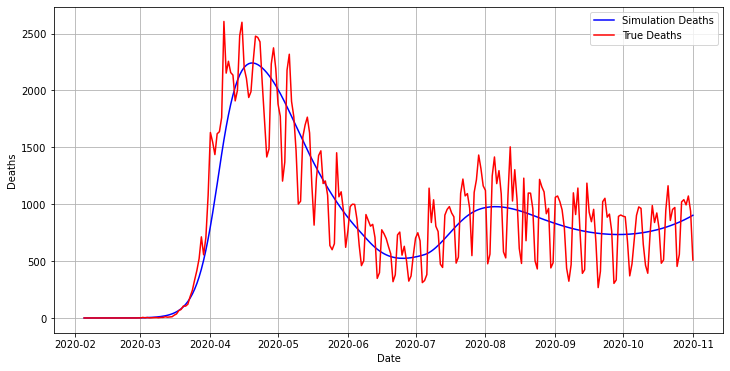

In [6]:
daily_deaths = real_data['total_deaths'].diff()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

# extend simulation till 2022 April using SEIR best parameters

In [7]:
real_data = pd.read_csv('time_series_covid19_deaths_US.csv')
columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
                   'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
real_data.drop(columns=columns_to_drop, inplace=True) 
real_data = real_data .transpose()  
real_data['total_deaths'] = real_data.sum(axis=1)  
real_data = real_data.iloc[:, [-1]] 
real_data.index = pd.to_datetime(real_data.index, format='%m/%d/%y')
daily_deaths = real_data['total_deaths'].diff()  
real_data = real_data.loc['2020-02-04':'2022-04-17']

In [8]:
death_df_to22 = pd.read_csv('yyg-seir-simulator/us_simulation_2022.csv')
death_df_to22['# dates'] = pd.to_datetime(death_df_to22['# dates'])
dates_np = death_df_to22['# dates'].to_numpy()
deaths_np = death_df_to22['deaths'].to_numpy()

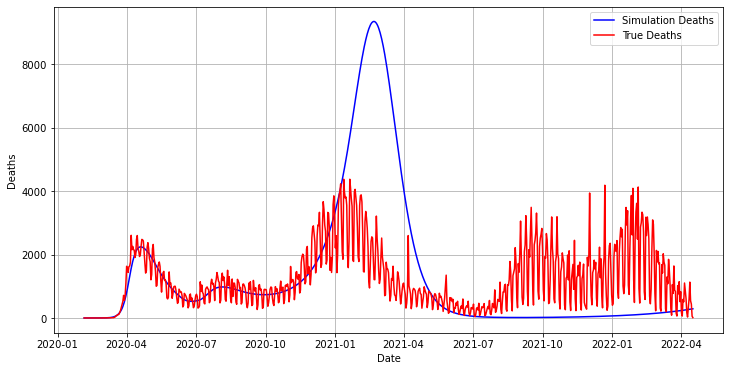

In [9]:
daily_deaths = real_data['total_deaths'].diff()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

# extend simulation till 2023 March 9th using own parameters

In [10]:
real_data = pd.read_csv('time_series_covid19_deaths_US.csv')
columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
                   'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
real_data.drop(columns=columns_to_drop, inplace=True) 
real_data = real_data .transpose()  
real_data['total_deaths'] = real_data.sum(axis=1)  
real_data = real_data.iloc[:, [-1]] 
real_data.index = pd.to_datetime(real_data.index, format='%m/%d/%y')
daily_deaths = real_data['total_deaths'].diff()  

In [11]:
death_df_to23 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_baseline.csv')
death_df_to23['# dates'] = pd.to_datetime(death_df_to23['# dates'])
dates_np = death_df_to23['# dates'].to_numpy()
deaths_np = death_df_to23['deaths'].to_numpy()

# grid search and parameter optimization

# 1.  baseline

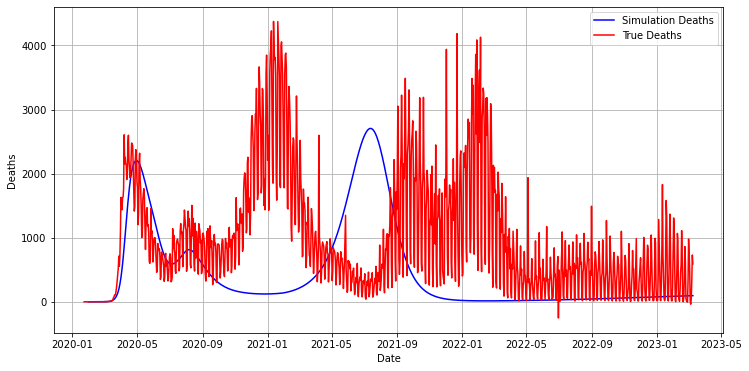

In [12]:
daily_deaths = real_data['total_deaths'].diff()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

# 2. INITIAL_R_0 optimization

INITIAL_R_0 0.8-6.

## 'INITIAL_R_0' : 0.8

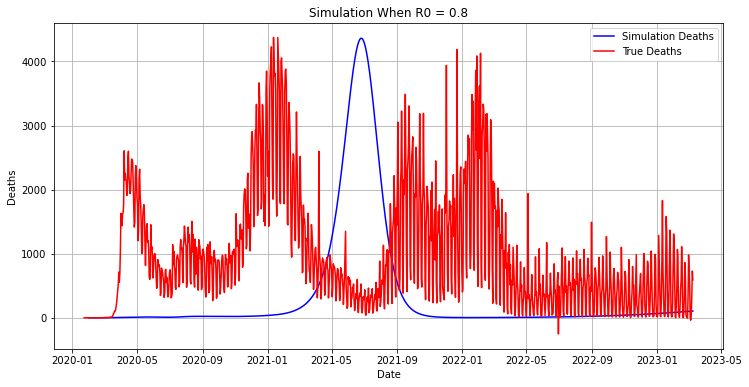

In [13]:
death_df_to23_r01 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_r0_1.csv')
death_df_to23_r01['# dates'] = pd.to_datetime(death_df_to23_r01['# dates'])
dates_np = death_df_to23_r01['# dates'].to_numpy()
deaths_np = death_df_to23_r01['deaths'].to_numpy()
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When R0 = 0.8')
plt.legend()
plt.grid(True)
plt.show()

## 'INITIAL_R_0' : 6

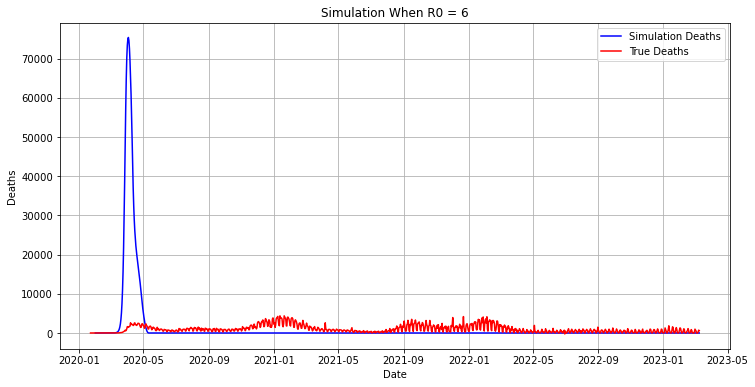

In [14]:
death_df_to23_r02 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_r0_2.csv')
death_df_to23_r02['# dates'] = pd.to_datetime(death_df_to23_r02['# dates'])
dates_np = death_df_to23_r02['# dates'].to_numpy()
deaths_np = death_df_to23_r02['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When R0 = 6')
plt.legend()
plt.grid(True)
plt.show()

## 'INITIAL_R_0' : 3

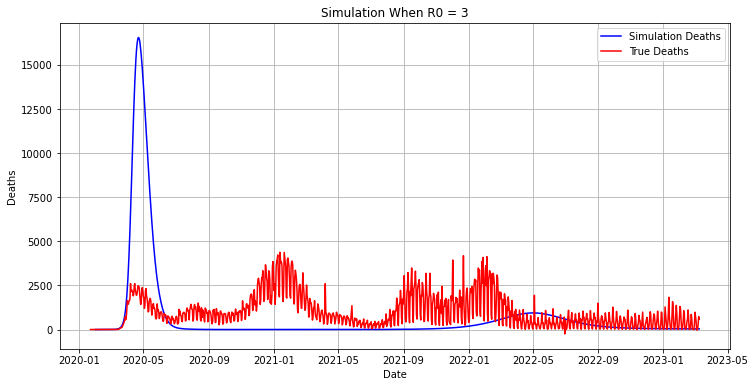

In [15]:
death_df_to23_r03 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_r0_3.csv')
death_df_to23_r03['# dates'] = pd.to_datetime(death_df_to23_r03['# dates'])
dates_np = death_df_to23_r03['# dates'].to_numpy()
deaths_np = death_df_to23_r03['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When R0 = 3')
plt.legend()
plt.grid(True)
plt.show()

## 'INITIAL_R_0' : 2

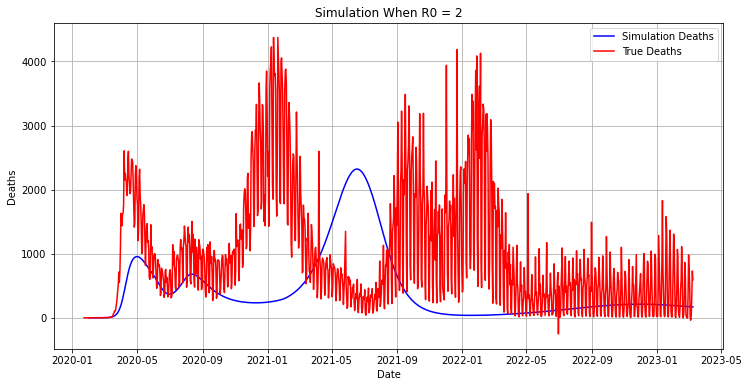

In [16]:
death_df_to23_r04 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_r0_4.csv')
death_df_to23_r04['# dates'] = pd.to_datetime(death_df_to23_r03['# dates'])
dates_np = death_df_to23_r04['# dates'].to_numpy()
deaths_np = death_df_to23_r04['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When R0 = 2')
plt.legend()
plt.grid(True)
plt.show()

## 'INITIAL_R_0' : 2.3

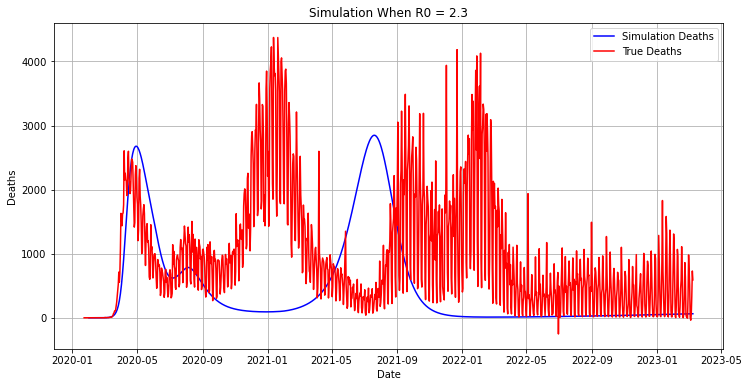

In [17]:
death_df_to23_r05 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_r0_5.csv')
death_df_to23_r05['# dates'] = pd.to_datetime(death_df_to23_r05['# dates'])
dates_np = death_df_to23_r05['# dates'].to_numpy()
deaths_np = death_df_to23_r05['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When R0 = 2.3')
plt.legend()
plt.grid(True)
plt.show()

## 'INITIAL_R_0' : 2.245

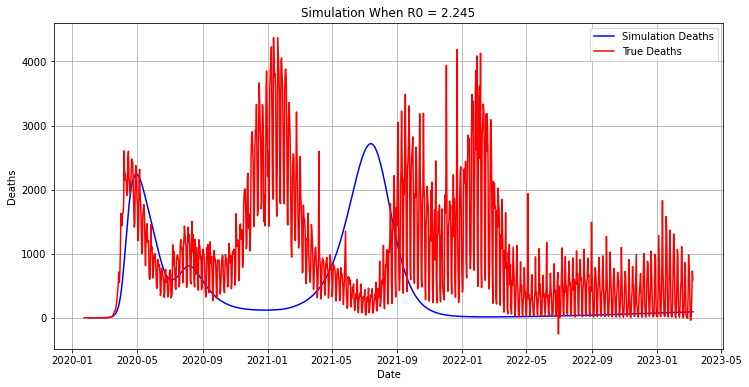

In [18]:
death_df_to23_r06 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_r0_6.csv')
death_df_to23_r06['# dates'] = pd.to_datetime(death_df_to23_r06['# dates'])
dates_np = death_df_to23_r06['# dates'].to_numpy()
deaths_np = death_df_to23_r06['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When R0 = 2.245')
plt.legend()
plt.grid(True)
plt.show()

## 'INITIAL_R_0' : 2.242

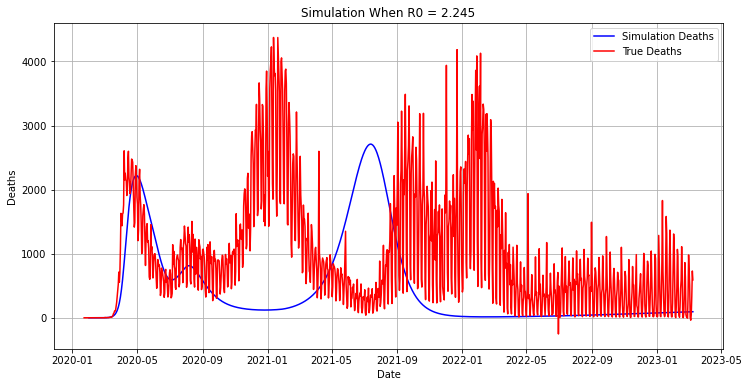

In [19]:
death_df_to23_r07 = pd.read_csv('yyg-seir-simulator/us_simulation_2023_r0_7.csv')
death_df_to23_r07['# dates'] = pd.to_datetime(death_df_to23_r07['# dates'])
dates_np = death_df_to23_r07['# dates'].to_numpy()
deaths_np = death_df_to23_r07['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When R0 = 2.245')
plt.legend()
plt.grid(True)
plt.show()

# 3. Lockdown_R_0 optimization

## LOCKDOWN_R_0' : 0.3

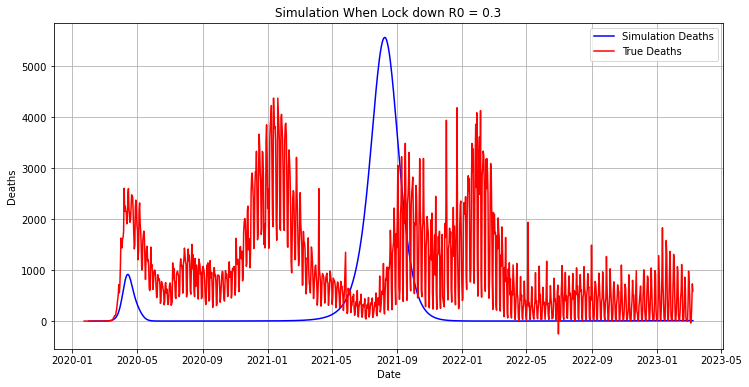

In [20]:
death_df_to23_lockdownr0_1 = pd.read_csv('yyg-seir-simulator/us_simulation_lockdown_r0_1.csv')
death_df_to23_lockdownr0_1['# dates'] = pd.to_datetime(death_df_to23_lockdownr0_1['# dates'])
dates_np = death_df_to23_lockdownr0_1['# dates'].to_numpy()
deaths_np = death_df_to23_lockdownr0_1['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When Lock down R0 = 0.3')
plt.legend()
plt.grid(True)
plt.show()

## LOCKDOWN_R_0' : 1.5

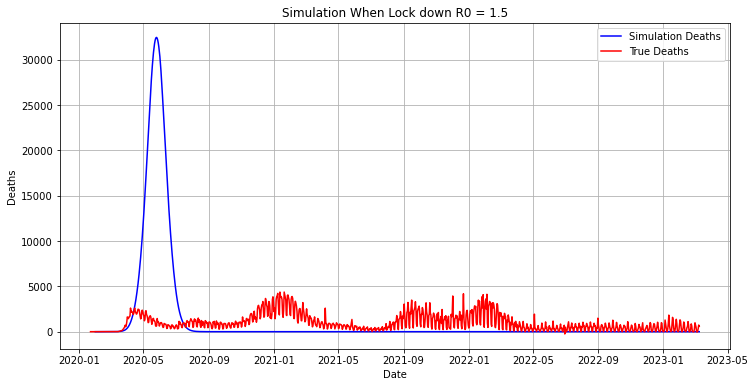

In [21]:
death_df_to23_lockdownr0_2 = pd.read_csv('yyg-seir-simulator/us_simulation_lockdown_r0_2.csv')
death_df_to23_lockdownr0_2['# dates'] = pd.to_datetime(death_df_to23_lockdownr0_2['# dates'])
dates_np = death_df_to23_lockdownr0_2['# dates'].to_numpy()
deaths_np = death_df_to23_lockdownr0_2['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When Lock down R0 = 1.5')
plt.legend()
plt.grid(True)
plt.show()

## LOCKDOWN_R_0' : 1

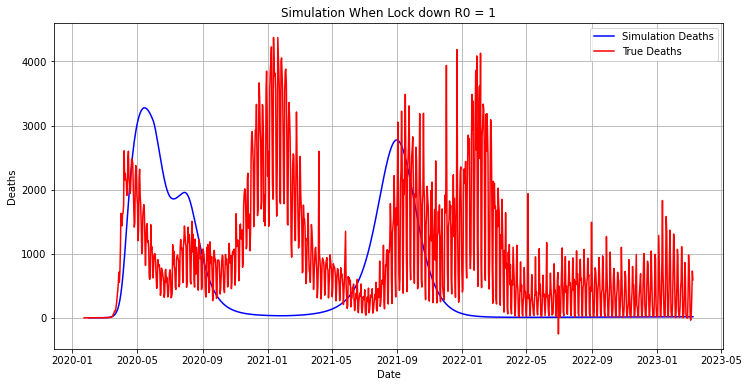

In [22]:
death_df_to23_lockdownr0_3 = pd.read_csv('yyg-seir-simulator/us_simulation_lockdown_r0_3.csv')
death_df_to23_lockdownr0_3['# dates'] = pd.to_datetime(death_df_to23_lockdownr0_3['# dates'])
dates_np = death_df_to23_lockdownr0_3['# dates'].to_numpy()
deaths_np = death_df_to23_lockdownr0_3['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When Lock down R0 = 1')
plt.legend()
plt.grid(True)
plt.show()

## LOCKDOWN_R_0' : 0.8

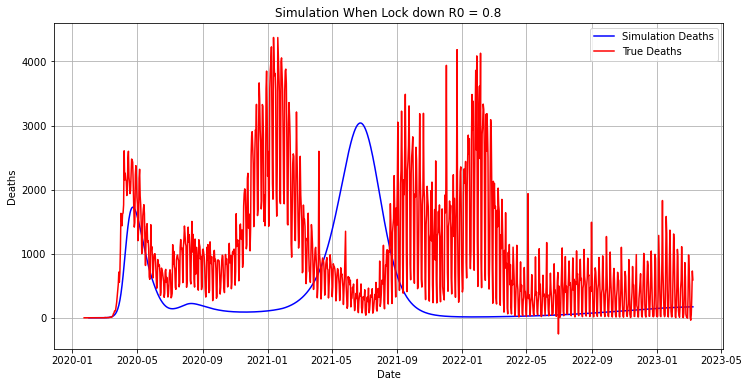

In [23]:
death_df_to23_lockdownr0_4 = pd.read_csv('yyg-seir-simulator/us_simulation_lockdown_r0_4.csv')
death_df_to23_lockdownr0_4['# dates'] = pd.to_datetime(death_df_to23_lockdownr0_4['# dates'])
dates_np = death_df_to23_lockdownr0_4['# dates'].to_numpy()
deaths_np = death_df_to23_lockdownr0_4['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When Lock down R0 = 0.8')
plt.legend()
plt.grid(True)
plt.show()

## LOCKDOWN_R_0' : 0.95

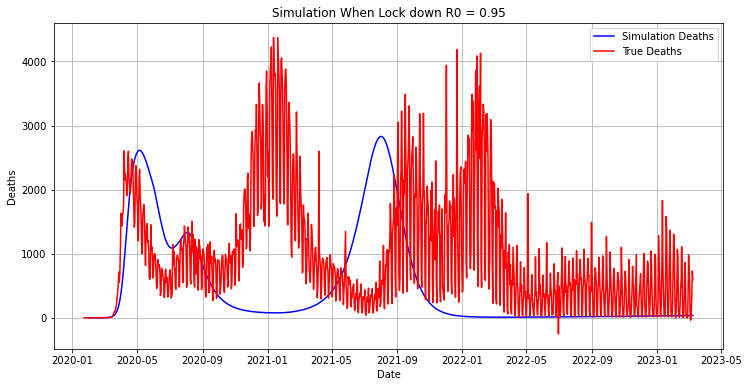

In [24]:
death_df_to23_lockdownr0_5 = pd.read_csv('yyg-seir-simulator/us_simulation_lockdown_r0_5.csv')
death_df_to23_lockdownr0_5['# dates'] = pd.to_datetime(death_df_to23_lockdownr0_5['# dates'])
dates_np = death_df_to23_lockdownr0_5['# dates'].to_numpy()
deaths_np = death_df_to23_lockdownr0_5['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When Lock down R0 = 0.95')
plt.legend()
plt.grid(True)
plt.show()

## LOCKDOWN_R_0' : 0.85

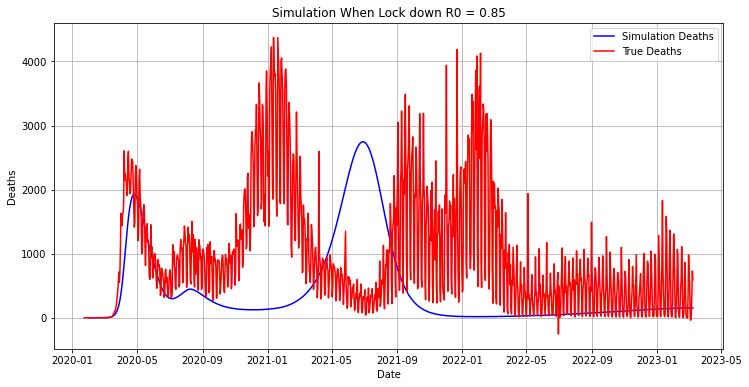

In [25]:
death_df_to23_lockdownr0_6 = pd.read_csv('yyg-seir-simulator/us_simulation_lockdown_r0_6.csv')
death_df_to23_lockdownr0_6['# dates'] = pd.to_datetime(death_df_to23_lockdownr0_6['# dates'])
dates_np = death_df_to23_lockdownr0_6['# dates'].to_numpy()
deaths_np = death_df_to23_lockdownr0_6['deaths'].to_numpy()  
plt.figure(figsize=(12, 6))
plt.plot(dates_np, deaths_np, color='blue',label='Simulation Deaths')
plt.plot(daily_deaths.index[1:].to_numpy(), daily_deaths[1:].to_numpy(), color='red', label='True Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Simulation When Lock down R0 = 0.85')
plt.legend()
plt.grid(True)
plt.show()